In [1]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
import keras.backend as K
import numpy as np
import pandas as pd
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

In [2]:
# Store the input data in a dataframe
conflict_data = pd.read_csv("C:/Users/victoriawu/Hackathon2021/conflict-prediction/replication_package/prediction_data/data_Java.csv")

#Show the data
conflict_data.head()

,parallel_changed_file_num,commit_num,file_added,file_removed,file_renamed,file_modified,file_copied,line_added,line_removed,developer_num,...,fix_frequency,improve_frequency,refactor_frequency,remove_frequency,update_frequency,use_frequency,messages_min,messages_max,messages_mean,messages_median
0,0,1,0,3,0,0,0,0,306,1,...,0,0,0,1,0,0,17,17,17.000000,17.0
1,0,15,-11,0,0,-80,0,-759,-254,-3,...,4,0,0,1,0,2,16,133,52.466667,48.0
2,0,3,-2,1,0,3,0,-24,16,0,...,0,0,0,0,1,0,42,62,49.333333,44.0
3,0,2,-7,-11,0,-39,0,-2316,-3378,0,...,0,0,0,0,1,0,17,42,29.500000,29.5
4,0,39,-65,-16,0,-230,0,-9213,-4131,-8,...,4,2,0,2,0,1,0,65,45.904762,45.0


In [3]:
# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(conflict_data)

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(conflict_data)

# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=conflict_data.columns)

# visualize the data frame
df_scaled

,parallel_changed_file_num,commit_num,file_added,file_removed,file_renamed,file_modified,file_copied,line_added,line_removed,developer_num,...,fix_frequency,improve_frequency,refactor_frequency,remove_frequency,update_frequency,use_frequency,messages_min,messages_max,messages_mean,messages_median
0,0.000000,0.000119,0.000000,0.000124,0.0,0.000000,0.0,0.000000e+00,1.298694e-05,0.002833,...,0.000000,0.000000,0.0,0.052632,0.000000,0.000000,0.0425,0.041667,0.042500,0.042394
1,0.000000,0.001785,-0.000327,0.000000,0.0,-0.000575,0.0,-4.322792e-05,-1.078001e-05,-0.008499,...,0.210526,0.000000,0.0,0.052632,0.000000,0.086957,0.0400,0.325980,0.131167,0.119701
2,0.000000,0.000357,-0.000059,0.000041,0.0,0.000022,0.0,-1.366891e-06,6.790559e-07,0.000000,...,0.000000,0.000000,0.0,0.000000,0.030303,0.000000,0.1050,0.151961,0.123333,0.109726
3,0.000000,0.000238,-0.000208,-0.000454,0.0,-0.000280,0.0,-1.319050e-04,-1.433657e-04,0.000000,...,0.000000,0.000000,0.0,0.000000,0.030303,0.000000,0.0425,0.102941,0.073750,0.073566
4,0.000000,0.004642,-0.001931,-0.000660,0.0,-0.001654,0.0,-5.247152e-04,-1.753237e-04,-0.022663,...,0.210526,0.181818,0.0,0.105263,0.000000,0.043478,0.0000,0.159314,0.114762,0.112219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26694,0.000000,0.002618,0.000000,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,-0.002833,...,0.157895,0.000000,0.0,0.157895,0.000000,0.000000,0.0450,0.578431,0.170714,0.089776
26695,0.000000,0.000238,0.000030,0.000248,0.0,0.000043,0.0,7.802668e-06,1.065269e-05,0.002833,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.1175,0.115196,0.117500,0.117207
26696,0.000000,0.002499,-0.001960,-0.002022,0.0,-0.001381,0.0,-4.562568e-04,-2.978509e-04,-0.014164,...,0.157895,0.000000,0.0,0.052632,0.090909,0.000000,0.0300,0.379902,0.151071,0.118454
26697,0.000089,0.001904,-0.000267,-0.000083,0.0,-0.000475,0.0,-2.311185e-04,-1.001607e-05,-0.005666,...,0.000000,0.000000,0.0,0.052632,0.000000,0.000000,0.0475,0.132353,0.091250,0.091022


In [4]:
conflict_labels = pd.read_csv("C:/Users/victoriawu/Hackathon2021/conflict-prediction/replication_package/prediction_data/label_Java.csv")

#Show the data
conflict_labels.head()

,is_conflict
0,0
1,0
2,0
3,0
4,0


In [5]:
#Append labels to the training data 
df_scaled.insert(28, 'is_conflict', conflict_labels)

df_scaled

,parallel_changed_file_num,commit_num,file_added,file_removed,file_renamed,file_modified,file_copied,line_added,line_removed,developer_num,...,improve_frequency,refactor_frequency,remove_frequency,update_frequency,use_frequency,messages_min,messages_max,messages_mean,messages_median,is_conflict
0,0.000000,0.000119,0.000000,0.000124,0.0,0.000000,0.0,0.000000e+00,1.298694e-05,0.002833,...,0.000000,0.0,0.052632,0.000000,0.000000,0.0425,0.041667,0.042500,0.042394,0
1,0.000000,0.001785,-0.000327,0.000000,0.0,-0.000575,0.0,-4.322792e-05,-1.078001e-05,-0.008499,...,0.000000,0.0,0.052632,0.000000,0.086957,0.0400,0.325980,0.131167,0.119701,0
2,0.000000,0.000357,-0.000059,0.000041,0.0,0.000022,0.0,-1.366891e-06,6.790559e-07,0.000000,...,0.000000,0.0,0.000000,0.030303,0.000000,0.1050,0.151961,0.123333,0.109726,0
3,0.000000,0.000238,-0.000208,-0.000454,0.0,-0.000280,0.0,-1.319050e-04,-1.433657e-04,0.000000,...,0.000000,0.0,0.000000,0.030303,0.000000,0.0425,0.102941,0.073750,0.073566,0
4,0.000000,0.004642,-0.001931,-0.000660,0.0,-0.001654,0.0,-5.247152e-04,-1.753237e-04,-0.022663,...,0.181818,0.0,0.105263,0.000000,0.043478,0.0000,0.159314,0.114762,0.112219,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26694,0.000000,0.002618,0.000000,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,-0.002833,...,0.000000,0.0,0.157895,0.000000,0.000000,0.0450,0.578431,0.170714,0.089776,0
26695,0.000000,0.000238,0.000030,0.000248,0.0,0.000043,0.0,7.802668e-06,1.065269e-05,0.002833,...,0.000000,0.0,0.000000,0.000000,0.000000,0.1175,0.115196,0.117500,0.117207,0
26696,0.000000,0.002499,-0.001960,-0.002022,0.0,-0.001381,0.0,-4.562568e-04,-2.978509e-04,-0.014164,...,0.000000,0.0,0.052632,0.090909,0.000000,0.0300,0.379902,0.151071,0.118454,0
26697,0.000089,0.001904,-0.000267,-0.000083,0.0,-0.000475,0.0,-2.311185e-04,-1.001607e-05,-0.005666,...,0.000000,0.0,0.052632,0.000000,0.000000,0.0475,0.132353,0.091250,0.091022,0


In [6]:
# Split the data into training (80%) and testing (20%)
train, test = train_test_split(df_scaled, test_size=0.2)

# Split data into features and labels (only using the first 29 columns as 30 is the amount and 31 is the label
train_features = np.array(train.values[:,:27])
train_labels = np.array(train.values[:,-1])
test_features = np.array(test.values[:,:27])
test_labels = np.array(test.values[:,-1])

In [8]:
model = Sequential()
model.add(Dense(units=100, kernel_initializer='uniform', input_dim=train_features.shape[1], activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [9]:
train_history = model.fit(train_features, train_labels, batch_size=50, epochs=200, verbose=1, validation_split=0.2)

Epoch 1/200
342/342 [==============================] - 1s 2ms/step - loss: 0.3159 - accuracy: 0.9161 - val_loss: 0.2526 - val_accuracy: 0.9216
Epoch 2/200
342/342 [==============================] - 0s 1ms/step - loss: 0.2572 - accuracy: 0.9229 - val_loss: 0.2445 - val_accuracy: 0.9253
Epoch 3/200
342/342 [==============================] - 0s 1ms/step - loss: 0.2520 - accuracy: 0.9237 - val_loss: 0.2383 - val_accuracy: 0.9258
Epoch 4/200
342/342 [==============================] - 0s 1ms/step - loss: 0.2490 - accuracy: 0.9240 - val_loss: 0.2351 - val_accuracy: 0.9277
Epoch 5/200
342/342 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.9247 - val_loss: 0.2281 - val_accuracy: 0.9272
Epoch 6/200
342/342 [==============================] - 0s 1ms/step - loss: 0.2393 - accuracy: 0.9239 - val_loss: 0.2241 - val_accuracy: 0.9274
Epoch 7/200
342/342 [==============================] - 0s 1ms/step - loss: 0.2348 - accuracy: 0.9230 - val_loss: 0.2225 - val_accuracy: 0.9265

Epoch 58/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1747 - accuracy: 0.9338 - val_loss: 0.2164 - val_accuracy: 0.9354
Epoch 59/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.9348 - val_loss: 0.2258 - val_accuracy: 0.9377
Epoch 60/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.9333 - val_loss: 0.2221 - val_accuracy: 0.9338
Epoch 61/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1743 - accuracy: 0.9345 - val_loss: 0.2193 - val_accuracy: 0.9382
Epoch 62/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.9353 - val_loss: 0.2326 - val_accuracy: 0.9373
Epoch 63/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9340 - val_loss: 0.2157 - val_accuracy: 0.9387
Epoch 64/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1739 - accuracy: 0.9349 - val_loss: 0.2160 - val_accuracy:

Epoch 115/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1401 - accuracy: 0.9469 - val_loss: 0.2796 - val_accuracy: 0.9438
Epoch 116/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1401 - accuracy: 0.9472 - val_loss: 0.2710 - val_accuracy: 0.9455
Epoch 117/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.9473 - val_loss: 0.2670 - val_accuracy: 0.9436
Epoch 118/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1439 - accuracy: 0.9453 - val_loss: 0.2885 - val_accuracy: 0.9401
Epoch 119/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1417 - accuracy: 0.9453 - val_loss: 0.2603 - val_accuracy: 0.9485
Epoch 120/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.9462 - val_loss: 0.2677 - val_accuracy: 0.9441
Epoch 121/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.9474 - val_loss: 0.2657 - val_ac

342/342 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.9496 - val_loss: 0.3367 - val_accuracy: 0.9473
Epoch 172/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1295 - accuracy: 0.9488 - val_loss: 0.3345 - val_accuracy: 0.9478
Epoch 173/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1300 - accuracy: 0.9504 - val_loss: 0.3330 - val_accuracy: 0.9471
Epoch 174/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.9482 - val_loss: 0.3266 - val_accuracy: 0.9490
Epoch 175/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.9498 - val_loss: 0.3392 - val_accuracy: 0.9450
Epoch 176/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1296 - accuracy: 0.9484 - val_loss: 0.3336 - val_accuracy: 0.9471
Epoch 177/200
342/342 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.9498 - val_loss: 0.3373 - val_accuracy: 0.9469

In [15]:
# Get model accuracy 
scores = model.evaluate(test_features, test_labels)
print('\n')
print('accuracy=',scores[1])

# Get predictions from model
output = model.predict_classes(test_features)

# Show confusion matrix
y_actu = pd.Series(test_labels, name='Actual')
y_pred = pd.Series(np.ndarray.flatten(output), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion, '\n\n')

print(sklearn.metrics.classification_report(y_actu, y_pred))

167/167 [==============================] - 0s 586us/step - loss: 0.2449 - accuracy: 0.9378


accuracy= 0.9378277063369751
Predicted     0    1
Actual              
0.0        4735  182
1.0         150  273 


              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      4917
         1.0       0.60      0.65      0.62       423

    accuracy                           0.94      5340
   macro avg       0.78      0.80      0.79      5340
weighted avg       0.94      0.94      0.94      5340



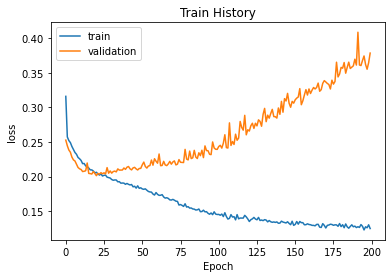

AUC: 0.93


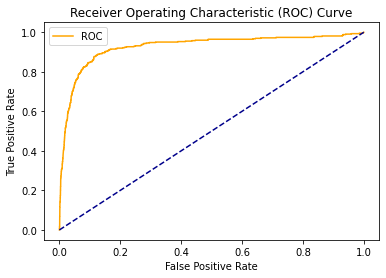

In [16]:
# Function to graph training history
def show_train_history(train_history,train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

show_train_history(train_history,'loss', 'val_loss')


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

probs = model.predict(test_features)
auc = sklearn.metrics.roc_auc_score(test_labels, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_labels, probs)
plot_roc_curve(fpr, tpr)